# Análise de Desempenho dos Parâmetros do Algoritmo Genético

In [1]:
import pandas as pd
import numpy as np

# Importação do matplotlib e seaborn para visualizações
from matplotlib import pyplot as plt
import seaborn as sns

Depois de fazer a importação das bibliotecas, irei carregar um arquivo csv, que é resultante da concatenação de todos os logs do experimento fatorial

In [2]:
dataset = pd.read_csv("logs/fatorial_test.csv")[
    ['nger',
    'npop',
    'cp',
    'mp',
    'xmaxc',
    'xmax_edge',
    'exec',
    'g',
    'worstFit',
    'fit_avg',
    'bestFit',
    'desvPad',
    'c',
    'weights']]

Abaixo são exibidos os primeiros 10 registros do dataframe

In [3]:
dataset.head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,exec,g,worstFit,fit_avg,bestFit,desvPad,c,weights
0,150,50,0.8,0.1,2.0,80,0,1,9.195462e+61,1.839165e+60,19777.206810,1.287364e+61,0.016017,[33.22550769 38.43338949 45.95275488 13.113731...
1,150,50,0.8,0.1,2.0,80,0,2,6.997617e+54,1.399529e+53,19777.206810,9.796663e+53,0.016017,[33.22550769 38.43338949 45.95275488 13.113731...
2,150,50,0.8,0.1,2.0,80,0,3,6.147158e+40,1.231466e+39,18166.865808,8.605742e+39,0.112327,[42.66173376 52.82910751 54.18287832 19.989365...
3,150,50,0.8,0.1,2.0,80,0,4,9.583641e+49,2.374122e+48,11673.711536,1.373013e+49,0.207663,[50.39417574 36.76324678 57.41724957 58.381735...
4,150,50,0.8,0.1,2.0,80,0,5,1.174711e+61,2.349423e+59,11673.711536,1.644596e+60,0.207663,[50.39417574 36.76324678 57.41724957 58.381735...
5,150,50,0.8,0.1,2.0,80,0,6,2.891924e+51,1.140400e+50,11673.711536,5.038970e+50,0.207663,[50.39417574 36.76324678 57.41724957 58.381735...
6,150,50,0.8,0.1,2.0,80,0,7,6.947495e+55,1.389527e+54,11673.711536,9.726489e+54,0.207663,[50.39417574 36.76324678 57.41724957 58.381735...
7,150,50,0.8,0.1,2.0,80,0,8,4.189836e+41,8.379672e+39,11673.711536,5.865770e+40,0.499001,[39.3463055 57.48459083 29.73849643 38.872923...
8,150,50,0.8,0.1,2.0,80,0,9,2.695114e+43,5.390668e+41,11673.711536,3.773153e+42,0.910389,[46.69535498 30.39567832 43.52293761 24.079110...
9,150,50,0.8,0.1,2.0,80,0,10,7.177826e+45,1.435566e+44,11673.711536,1.004896e+45,0.910389,[46.69535498 30.39567832 43.52293761 24.079110...


Nos testes, para cada combinação de parâmetros o AG foi executado 10 vezes. Isso foi feito para diminuir a probabilidade de uma determinada combinação de parâmetros se destacar por sorte da aleatoriedade. Sendo assim irei agregar os dados de todas as execuções pela média, tornando o conjunto de dados 10 vezes menor.

In [4]:
datasetAgrupado = dataset.drop(['c', 'weights'], axis=1).groupby(['nger', 'npop', 'cp', 'mp', 'xmaxc', 'xmax_edge', 'g']).mean().reset_index().drop('exec', axis=1)

datasetAgrupado.head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
0,70,20,0.8,0.01,2.0,80,1,8.951871e+54,7.871508e+53,118620.807879,2.395169e+54
1,70,20,0.8,0.01,2.0,80,2,1.118576e+49,5.592883e+47,54398.064399,2.437881e+48
2,70,20,0.8,0.01,2.0,80,3,6.038205e+56,3.019103e+55,43009.160953,1.315996e+56
3,70,20,0.8,0.01,2.0,80,4,7.545721e+41,3.772860e+40,38101.712043,1.644552e+41
4,70,20,0.8,0.01,2.0,80,5,5.719186e+40,2.859593e+39,29577.063046,1.246468e+40
5,70,20,0.8,0.01,2.0,80,6,8.459461e+20,4.230089e+19,25248.775786,1.843689e+20
6,70,20,0.8,0.01,2.0,80,7,3.059656e+20,1.529829e+19,17881.847350,6.668365e+19
7,70,20,0.8,0.01,2.0,80,8,9.048535e+12,4.595212e+11,16883.328532,1.970528e+12
8,70,20,0.8,0.01,2.0,80,9,9.534801e+13,4.772276e+12,16257.391962,2.077950e+13
9,70,20,0.8,0.01,2.0,80,10,5.174640e+11,4.117405e+10,15804.772145,1.154452e+11


Agora, para uma análise inicial, irei selecionar apenas a última geração de cada combinação e exibir os dados ordenados em ordem crescente pela média da média das execuções

In [20]:
datasetFinal = datasetAgrupado[datasetAgrupado['g'] == datasetAgrupado['nger']-1]
datasetFinal.sort_values(by=['fit_avg']).head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
7239,150,20,1.0,0.01,2.0,100,149,3208.375069,1598.685863,794.141813,565.496880
3275,100,20,1.0,0.01,2.0,100,99,3186.595401,1602.656630,867.764607,576.907494
6345,150,20,0.8,0.01,2.0,100,149,4408.497458,1632.935054,779.467305,858.232733
551,70,20,1.0,0.01,2.0,100,69,3326.651375,1790.098846,971.437934,597.679729
137,70,20,0.8,0.01,2.0,100,69,4854.736448,1933.354645,956.948558,898.377777
2681,100,20,0.8,0.01,2.0,100,99,3980.215690,1935.031309,976.292099,713.485877
965,70,30,0.8,0.01,2.0,100,69,10485.508878,2296.708334,894.373885,1938.243816
1379,70,30,1.0,0.01,2.0,100,69,17514.973991,2517.293618,872.909966,3053.187928
10815,150,50,1.0,0.01,2.0,100,149,23767.820777,2704.437376,797.563312,3590.679863
4364,100,30,1.0,0.01,2.0,80,99,8105.588123,3070.589249,1257.061148,1394.537404


Ao analisar pela média, vemos que a melhor combinação é a que faz o uso de uma população com 20 elementos, 150 gerações, probabilidade de cruzamento de 100%, probabilidade de mutação de 1% e valor máximo da aresta de 100. Além da menor média, essa combinação também gerou um desvio padrão baixo. Abaixo é exibido a evolução da média com as outras medidas estatística por geração.

No gráfico abaixo, em escala logaritmica, a média está traçada em linha preta. Na linha vermelha estão representados os piores indivíduos de cada geração e na linha azul os melhores. Vale ressaltar mais uma vez que todos esses valores se referem às médias das 10 execuções.

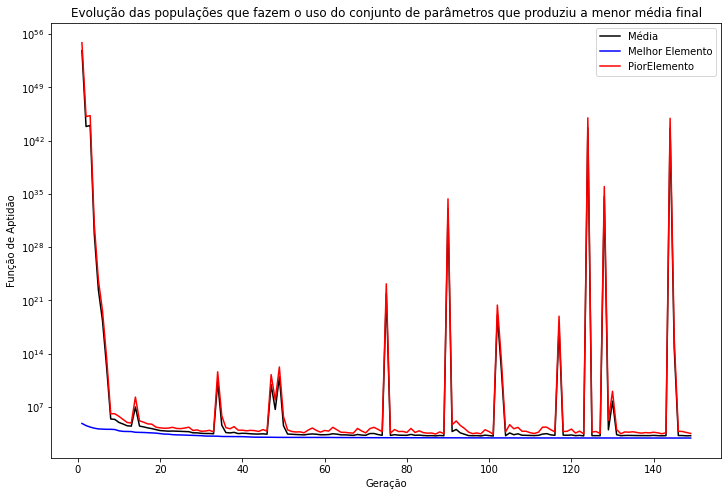

In [30]:
dsMenorMedia = datasetAgrupado.loc[(datasetAgrupado.nger == 150) & (datasetAgrupado.npop == 20) & (datasetAgrupado.cp == 1.0) & (datasetAgrupado.mp == 0.01) & (datasetAgrupado.xmax_edge == 100)]

plt.figure(figsize=(12,8))

ax = plt.axes()

ax.plot(dsMenorMedia.g, dsMenorMedia.fit_avg, color='black', label='Média')
ax.plot(dsMenorMedia.g, dsMenorMedia.bestFit, color='blue', label='Melhor Elemento')
ax.plot(dsMenorMedia.g, dsMenorMedia.worstFit, color='red', label='PiorElemento')

ax.set(xlabel='Geração', ylabel='Função de Aptidão', title='Evolução das populações que fazem o uso do conjunto de parâmetros que produziu a menor média final')
plt.yscale('log')

plt.legend()


Observamos pelo gráfico que existe uma tendência de queda na curva, mais acentuada nas primeiras gerações. É notável no gráfico também várias oscilações no pior indivíduo, que acabam influenciando a média de maneira significante. Essas oscilações podem ser causadas, por exemplo, pela mutação dos indivíduos. A curva do melhor indivíduo aparentemene apenas decresce no início, mas analisando o gráfico abaixo, que plota apenas o melhor indivíduo, é possível observar uma tendência de queda até a última geração.

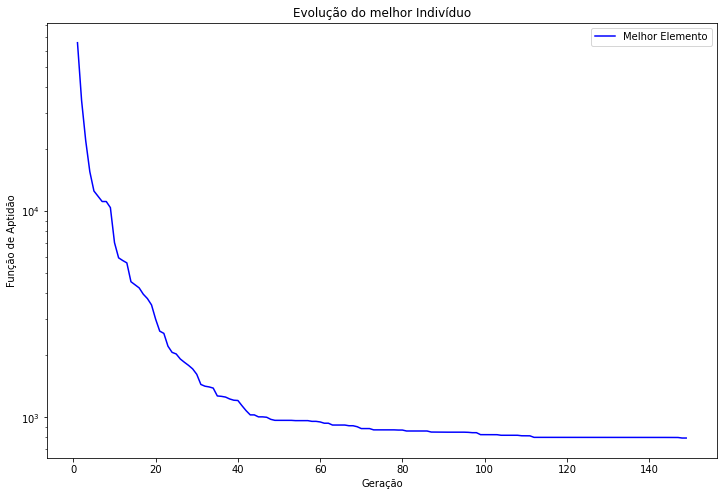

In [37]:
plt.figure(figsize=(12,8))

ax = plt.axes()

ax.plot(dsMenorMedia.g, dsMenorMedia.bestFit, color='blue', label='Melhor Elemento')

ax.set(xlabel='Geração', ylabel='Função de Aptidão', title='Evolução do melhor Indivíduo')
plt.yscale('log')

plt.legend()

Agora irei realizar a mesma análise, mas voltada para o conjunto de parâmetros que levou ao melhor fit na última geração

In [33]:
datasetFinal.sort_values(by=['bestFit']).head(5)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
8133,150,30,0.8,0.01,2.0,100,149,5.191199e+04,3.921235e+03,757.594494,9.943418e+03
6345,150,20,0.8,0.01,2.0,100,149,4.408497e+03,1.632935e+03,779.467305,8.582327e+02
7239,150,20,1.0,0.01,2.0,100,149,3.208375e+03,1.598686e+03,794.141813,5.654969e+02
9027,150,30,1.0,0.01,2.0,100,149,1.794580e+22,5.981933e+20,794.363499,3.221370e+21
10815,150,50,1.0,0.01,2.0,100,149,2.376782e+04,2.704437e+03,797.563312,3.590680e+03


Com essa métrica de análise, o melhor conjunto faz o uso de uma população com 30 elementos, 150 gerações, probabilidade de cruzamento de 80% e probabilidade de mutação de 1%. A única variação em relação ao conjunto analisado anteriormente é a taxa de cruzamento e o número de indivíduos da população

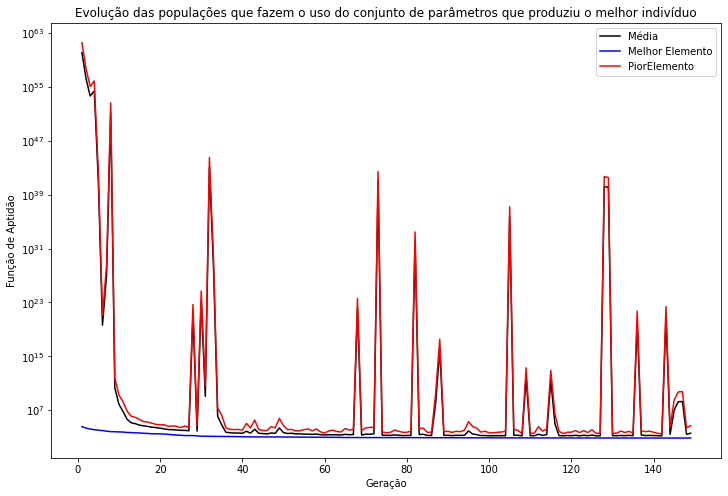

In [35]:
dsMenorElemento = datasetAgrupado.loc[(datasetAgrupado.nger == 150) & (datasetAgrupado.npop == 30) & (datasetAgrupado.cp == 0.8) & (datasetAgrupado.mp == 0.01) & (datasetAgrupado.xmax_edge == 100)]

plt.figure(figsize=(12,8))

ax = plt.axes()

ax.plot(dsMenorElemento.g, dsMenorElemento.fit_avg, color='black', label='Média')
ax.plot(dsMenorElemento.g, dsMenorElemento.bestFit, color='blue', label='Melhor Elemento')
ax.plot(dsMenorElemento.g, dsMenorElemento.worstFit, color='red', label='PiorElemento')

ax.set(xlabel='Geração', ylabel='Função de Aptidão', title='Evolução das populações que fazem o uso do conjunto de parâmetros que produziu o melhor indivíduo')
plt.yscale('log')

plt.legend()

Nessa população aconteceu o mesmo, queda com grandes oscilações. Também irei plotar apenas o melhor indivíduo

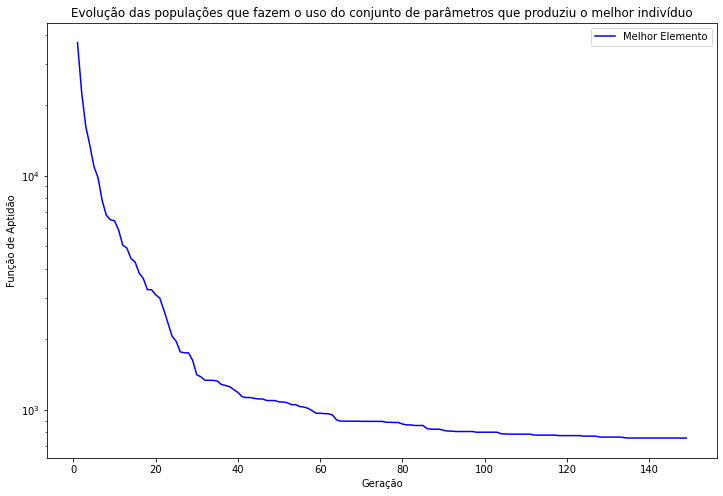

In [36]:
plt.figure(figsize=(12,8))

ax = plt.axes()

ax.plot(dsMenorElemento.g, dsMenorElemento.bestFit, color='blue', label='Melhor Elemento')

ax.set(xlabel='Geração', ylabel='Função de Aptidão', title='Evolução das populações que fazem o uso do conjunto de parâmetros que produziu o melhor indivíduo')
plt.yscale('log')

plt.legend()

Em todas essas análises foi realizado a média das 10 execuções. Agora irei utilizar o dataset não agrupado para descobrir quais foram os parâmetros gerados e assim de fato realizar a previsão com esses parâmetros.

In [41]:
dataset.loc[(dataset.nger == dataset.g+1) & (dataset.nger == 150) & (dataset.npop == 30) & (dataset.cp == 0.8) & (dataset.mp == 0.01) & (dataset.xmax_edge == 100)]

,nger,npop,cp,mp,xmaxc,xmax_edge,exec,g,worstFit,fit_avg,bestFit,desvPad,c,weights
42498,150,30,0.8,0.01,2.0,100,0,149,2816.445056,1721.856860,670.371616,495.455678,0.073703,[97.50956917 76.1439533 78.28998745 7.116151...
42499,150,30,0.8,0.01,2.0,100,0,149,3883.158408,1878.733911,670.371616,723.756551,0.010220,[97.49256083 72.89035437 66.83182798 26.362897...
42648,150,30,0.8,0.01,2.0,100,1,149,1873.320218,1294.791194,751.450293,288.973191,0.016959,[79.25157525 89.30323697 54.35286971 64.398371...
42649,150,30,0.8,0.01,2.0,100,1,149,1609.903760,1209.162483,751.450293,218.714556,0.016959,[79.25157525 89.30323697 54.35286971 64.398371...
42798,150,30,0.8,0.01,2.0,100,2,149,14967.200325,4504.157847,778.329321,3420.651890,0.025895,[84.52791125 51.92726963 42.3455349 71.257130...
42799,150,30,0.8,0.01,2.0,100,2,149,728688.751133,29924.513445,778.329321,129899.832873,0.025895,[84.52791125 51.92726963 42.3455349 71.257130...
42948,150,30,0.8,0.01,2.0,100,3,149,195677.539615,14709.944361,798.499944,48322.222874,0.045385,[92.50640581 49.69669461 55.05466326 74.262727...
42949,150,30,0.8,0.01,2.0,100,3,149,17408.528583,2340.236456,798.499944,2954.344735,0.052738,[96.23291579 62.01909273 79.88834914 83.078825...
43098,150,30,0.8,0.01,2.0,100,4,149,2146.147882,1403.951989,747.917848,321.555787,0.028179,[86.80657072 73.40720372 38.19999154 51.257711...
43099,150,30,0.8,0.01,2.0,100,4,149,1898.284432,1339.416842,747.917848,267.873514,0.028179,[86.80657072 73.40720372 38.19999154 51.257711...
